# Titanic Data Exploratory Analysis 

## Background 
The purpose of this document is to analyze the titanic dataset provided on kaggle (https://www.kaggle.com/c/titanic/data) to uncover some of the factors that went into the survival rate of the passengers on that ship. The main goal is to practice data analysis and visualization in python and to go through the entire analytical process, from the hypothesis to the conclusion. If there is time, I will also make a scikit model. 

## Reseach Questions 
The titanic dataset contains information on just under 900 people that went abord the titanic ship. Having no background on the titanic (I did not watch the movie), I would assume the factors that impacts the survival rating the most would be age (and gender), title(ticket prices), and family
- younger people are physically capable than older people, and men are statistically stronger than women. These variables will directly impact survival 
- title: rich people with cabin space will probably survive as they would have first priority on the livesaving vessles 
- family: the more family members, the more people to account for. If a mother is looking for her child or vice-versa, they both would have a lower chance of survival 

In [1]:
# importing libraries and dataset (pandas and numpy)
import pandas as pd 
from pandas import Series, DataFrame 

import numpy as np 
import os 
import matplotlib.pyplot as plt 
%matplotlib inline 



In [3]:
# import dataframe from CSV 
df = pd.read_csv(r'titanic_data.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
for column in df:
    print df[column].value_counts()

891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Graham, Mr. George Edward                                  1
Elias, Mr. Tannous                                         1
Madill, Miss. Georgette Alexandra                          1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)        1
Beane, Mrs. Edward (Ethel Clarke)                          1
Roebling, Mr.

## Missing values 

There are missing values for both the age, embarked and cabin values. The cabin values are understandable, since not every passenger would be assigned a cabin. Cabins would be a luxury of those who paid higher ticket prices. I would assume that the deck would be the other place.

There are two missing values for the embarked column, which we may be able to infer based on the ticket price or another factor. 
Lastly, and most importantly, a few hundred entries do not have age associated, which is shocking, as we would have to predict the age using SCIKIT learn. 

In [14]:
# to get a better understanding of the age distribution, lets check a histogram of the age 

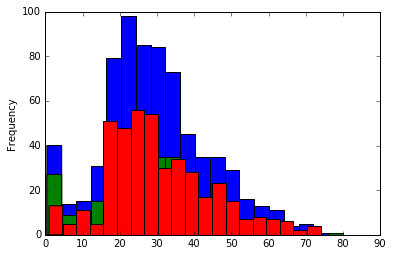

In [47]:
df.Age.plot(kind = 'hist', bins = 20)
survived = df.loc[df.Survived == 1]
survived.Age.plot(kind = 'hist', bins = 20)
died.Age.plot(kind = 'hist', bins = 20)

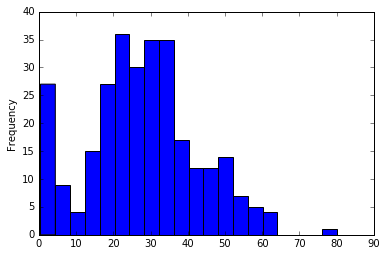

In [40]:
survived = df.loc[df.Survived == 1]
survived.Age.plot(kind = 'hist', bins = 20)

In [45]:
died = df.loc[df.Survived == 0]

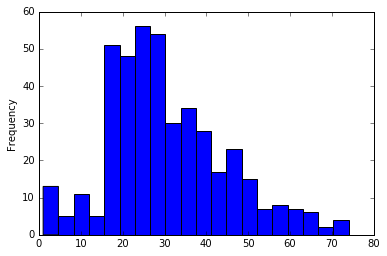

In [46]:
died.Age.plot(kind = 'hist', bins = 20)

If you look, more of the younger population survived, and more of the older population did not survive. 
A majority of the chidlren under 10 survived and most of the teens between 10 and 20 also survived. This might be due to the fact that younger children were given first priority to the emergency vessles and those who were younger were more athletic to stand the freezing temperature of the ice-water 

For each age range, find the percentage of people that survived vs died. 
How do we do this? How about lets look at the missing data first. See how many of those survived 

In [58]:
missing = df.loc[df.Age.isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [51]:
# as you can see, most of these passengers are in the lowest economical class and was not assigneda cabin 
# did someone just forget about the age of these passengers? What are the differences between this and the regular dataframe 

In [60]:
# first, lets look at the average PClass of the missing vs the non-missing 
not_missing = df.loc[df.Age.isnull() == False]

In [61]:
not_missing.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [64]:
print missing.Pclass.describe()
print ('-----------------------')
print not_missing.Pclass.describe()
# same class 

count    177.000000
mean       2.598870
std        0.763216
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
-----------------------
count    714.000000
mean       2.236695
std        0.838250
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


In [63]:
# this missing variable has significantly more people of lower economic status, how about survival rate? 

In [65]:
print missing.Pclass.describe()
print ('-----------------------')
print not_missing.Pclass.describe()

count    177.000000
mean       0.293785
std        0.456787
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
-----------------------
count    714.000000
mean       0.406162
std        0.491460
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [66]:
# the people who did not survive did not have dates. Were they stowaways? 


In [67]:
print missing.Fare.describe()
print ('-----------------------')
print not_missing.Fare.describe()

count    177.000000
mean      22.158567
std       31.874608
min        0.000000
25%        7.750000
50%        8.050000
75%       24.150000
max      227.525000
Name: Fare, dtype: float64
-----------------------
count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64


In [68]:
# the people who were not missing paid a lot more money than those who were missing. 
# maybe this is because some people's ages were obtained retroactively? That those who did not survive had no 
# chance to give their age? 
print df.Age.max()

80.0


In [75]:
# since 80 is the largest value, we can do 8 total bins, to look at how many people survived in each period of their lives
# and the percentage 
bined  = pd.cut(df.Age, bins = 8)

In [86]:
bined.dtype

category

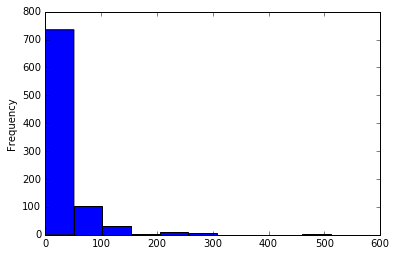

In [92]:
df.Fare.plot(kind = 'hist')

In [91]:
df.Fare = df.Fare.astype(int)

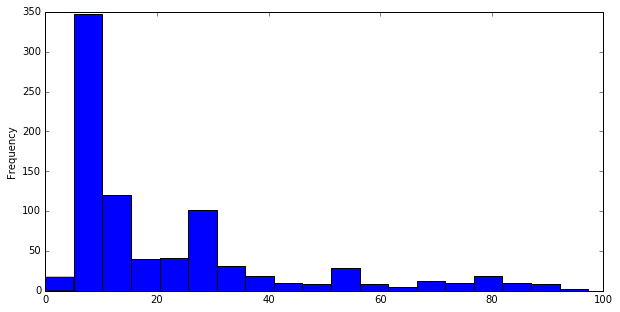

In [104]:
df.Fare.plot(kind = 'hist', bins = 100, figsize = (10, 5), xlim = (0,100))

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S


In [111]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

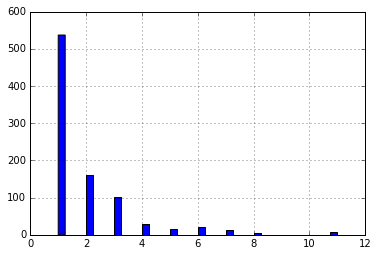

In [112]:
df.Family.hist(bins = 40)

In [ ]:
# most don't have family, lets check how many people who do have family survive 